In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from matplotlib import pyplot
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
print("training set:",x_train.shape,"\ntest set:",x_test.shape)

training set: (50000, 32, 32, 3) 
test set: (10000, 32, 32, 3)


In [3]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truck']

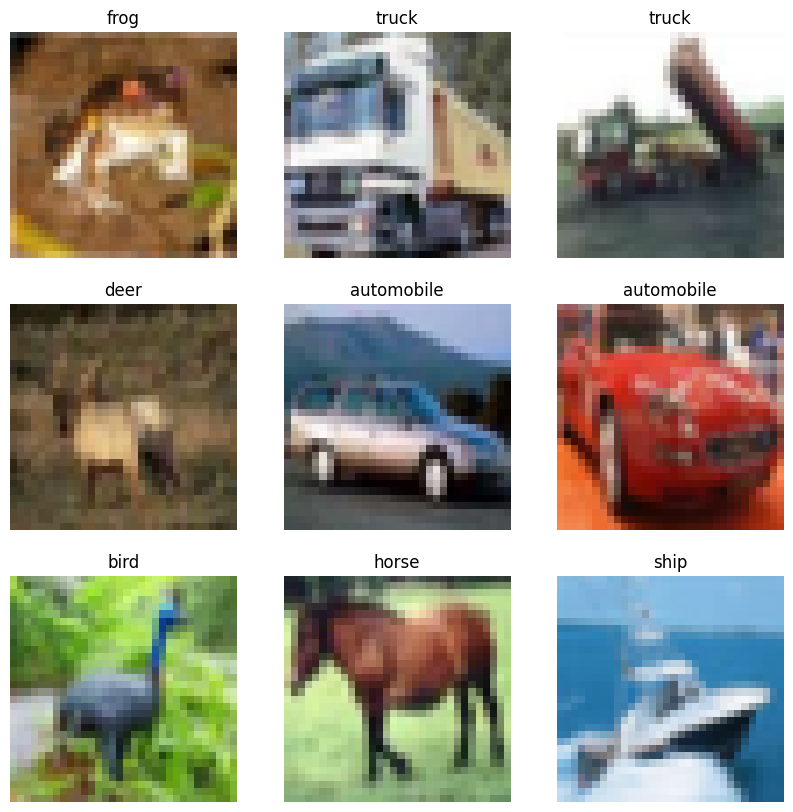

In [5]:
pyplot.figure(figsize=(10, 10))
for i in range(9):

  ax = pyplot.subplot(3, 3, i + 1)

  pyplot.imshow(tf.squeeze(x_train[i]))

  pyplot.title(labels[np.where(y_train[i]==1)[0][0]])

  pyplot.axis("off")

In [6]:
x_train = np.array(x_train).reshape(x_train.shape[0], 32, 32, 3)
x_test = np.array(x_test).reshape(x_test.shape[0], 32, 32, 3)

In [7]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train.shape

(50000, 32, 32, 3)

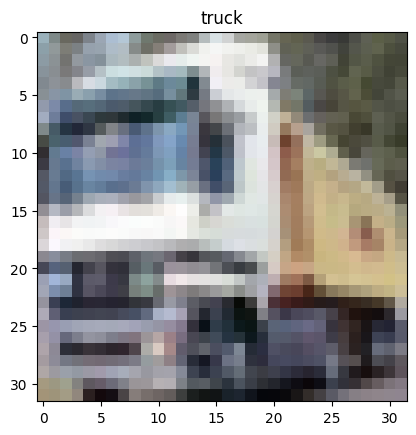

In [8]:
pyplot.imshow( tf.squeeze(x_train[1]) )
pyplot.title(labels[np.where(y_train[1]==1)[0][0]])
pyplot.show()

In [9]:
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet' )
print()
for layer in resnet.layers:
  print(layer.name)


input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3

In [10]:
model = Sequential()
model.add(keras.applications.resnet50.ResNet50(input_shape = (32,32,3), include_top = False, weights = 'imagenet'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax' ))
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics = "accuracy") 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23851274 (90.99 MB)
Trainable params: 23798154 (90.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [12]:
# model.trainable=False
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.33)

Epoch 1/5
262/262 [==============================] - 240s 910ms/step - loss: 1.5766 - accuracy: 0.4733 - val_loss: 23.9527 - val_accuracy: 0.0981
Epoch 2/5
262/262 [==============================] - 238s 908ms/step - loss: 0.7905 - accuracy: 0.7291 - val_loss: 8.4385 - val_accuracy: 0.0998
Epoch 3/5
262/262 [==============================] - 235s 897ms/step - loss: 0.4776 - accuracy: 0.8380 - val_loss: 2.9676 - val_accuracy: 0.2888
Epoch 4/5
262/262 [==============================] - 233s 888ms/step - loss: 0.2880 - accuracy: 0.9044 - val_loss: 1.1430 - val_accuracy: 0.6617
Epoch 5/5
262/262 [==============================] - 239s 912ms/step - loss: 0.1862 - accuracy: 0.9395 - val_loss: 1.0046 - val_accuracy: 0.7209
